<a href="https://colab.research.google.com/github/JosephAkayesi/100KataChallenge/blob/master/Day_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import health-facilties-gh data file and read head


In [3]:
hf_df = pd.read_csv('https://raw.githubusercontent.com/ngunyimacharia/GhanaHealth/master/health-facilities-gh.csv') #health-facilities-gh
hf_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


## Metadata of data file

In [5]:
hf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
Region          3756 non-null object
District        3756 non-null object
FacilityName    3756 non-null object
Type            3756 non-null object
Town            3603 non-null object
Ownership       3756 non-null object
Latitude        3732 non-null float64
Longitude       3732 non-null float64
dtypes: float64(2), object(6)
memory usage: 234.8+ KB


In [6]:
hf_df.columns


Index(['Region', 'District', 'FacilityName', 'Type', 'Town', 'Ownership',
       'Latitude', 'Longitude'],
      dtype='object')

In [7]:
hf_df.describe()

,Latitude,Longitude
count,3732.000000,3732.000000
mean,6.955678,-1.074580
std,1.679332,1.021352
min,4.796180,-3.235880
25%,5.687642,-1.809792
50%,6.468705,-1.058117
75%,7.430555,-0.215870
max,11.146670,1.191440


### Number of facilties in each region

In [8]:
hf_df.groupby('Region').nunique()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
Region,,,,,,,,
Ashanti,1,27,640,14,427,5,512,510
Brong Ahafo,1,25,310,15,197,7,250,250
Central,1,17,297,17,218,4,194,194
Eastern,1,22,387,11,311,5,335,337
Greater Accra,1,7,484,14,234,6,419,419
Northern,1,18,260,15,217,4,210,216
Upper East,1,10,227,14,180,4,210,208
Upper West,1,10,160,12,134,4,122,123
Volta,1,15,394,13,293,5,295,295


##### --- There are fewer facilties in Northern region as opposed to the number of facilities in other regions despite the Northern region having a larger geographical area compared to regions with smaller geographical areas

## Import health-facilty-tiers data file and read head

In [9]:
hft_df = pd.read_csv('https://raw.githubusercontent.com/ngunyimacharia/GhanaHealth/master/health-facility-tiers.csv')
hft_df.head()

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2


## Read metadata of data file


In [10]:
hft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 3 columns):
Region      1475 non-null object
Facility    1475 non-null object
Tier        1475 non-null int64
dtypes: int64(1), object(2)
memory usage: 34.6+ KB


In [12]:
hft_df.columns

Index(['Region', 'Facility', 'Tier'], dtype='object')

In [13]:
hft_df.describe()

,Tier
count,1475.000000
mean,2.818305
std,0.385724
min,2.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


## Number of tier facilities in each region

In [14]:
hf_df.groupby('Region').nunique()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
Region,,,,,,,,
Ashanti,1,27,640,14,427,5,512,510
Brong Ahafo,1,25,310,15,197,7,250,250
Central,1,17,297,17,218,4,194,194
Eastern,1,22,387,11,311,5,335,337
Greater Accra,1,7,484,14,234,6,419,419
Northern,1,18,260,15,217,4,210,216
Upper East,1,10,227,14,180,4,210,208
Upper West,1,10,160,12,134,4,122,123
Volta,1,15,394,13,293,5,295,295


### Population of each region as of 2010 according to wikipedia
[List of Ghanaian regions by population](https://en.wikipedia.org/wiki/List_of_Ghanaian_regions_by_population)

In [230]:
pop_df = pd.DataFrame({
    'Region': ['Ashanti', 'Brong Ahafo', 'Central', 'Eastern', 'Greater Accra', 'Northern', 'Upper East', 'Upper West', 'Volta', 'Western'],
    'Population': [4780380, 2310983, 2201863, 2633154, 4010054, 2479461, 1046545, 702110, 2118252, 2376021],
    'Size': rbo_df.groupby('Region')['Region'].count()
})

pop_df


,Population,Region,Size
Region,,,
Ashanti,4780380,Ashanti,975
Brong Ahafo,2310983,Brong Ahafo,455
Central,2201863,Central,399
Eastern,2633154,Eastern,484
Greater Accra,4010054,Greater Accra,1037
Northern,2479461,Northern,311
Upper East,1046545,Upper East,272
Upper West,702110,Upper West,197
Volta,2118252,Volta,453


In [218]:
allRegions = []
allOwnership = []

for i, row in hf_df.iterrows():
  allRegions.append(row.Region)
  
for i, row in hft_df.iterrows():
  allRegions.append(row.Region)
  
rbo_df = {
    'Region': allRegions,
}

rbo_df = pd.DataFrame(rbo_df['Region'])

rbo_df.columns = ['Region']
rbo_df.groupby('Region')['Region'].count()




Region
Ashanti           975
Brong Ahafo       455
Central           399
Eastern           484
Greater Accra    1037
Northern          311
Upper East        272
Upper West        197
Volta             453
Western           648
Name: Region, dtype: int64

## Correlation of Population to Size(Number of Facilties)


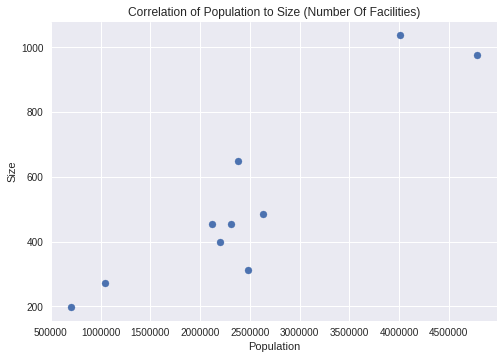

In [233]:
plt.scatter( pop_df['Population'], pop_df['Size'])
plt.xlabel('Population')
plt.ylabel('Size')
plt.title(r'Correlation of Population to Size (Number Of Facilities)')
plt.show()

#### --- _There is a good correlation between hospital facilities and population. The higher the population the greater the number of facilities and hence facilities are evenly and well distributed across the regions_

## Number oif facilites in each region based on ownership


In [244]:
pd.crosstab(hf_df.Region, hf_df.Ownership)


Ownership,CHAG,Clinic,Government,Islamic,Maternity Home,Mission,Muslim,NGO,Private,Quasi-Government,government,private
Region,,,,,,,,,,,,
Ashanti,71,0,215,1,0,0,0,0,350,21,0,0
Brong Ahafo,20,1,245,0,2,0,1,0,78,1,0,0
Central,16,0,226,0,0,0,0,0,55,2,0,0
Eastern,25,0,275,0,0,0,0,0,83,8,0,2
Greater Accra,13,0,102,0,0,0,0,2,360,26,1,0
Northern,28,0,224,0,0,0,0,0,13,2,0,0
Upper East,23,0,195,0,0,0,0,0,13,1,0,0
Upper West,12,0,138,2,0,0,0,0,9,0,0,0
Volta,19,0,301,0,0,0,0,0,72,1,5,0


#### --- _Generally for Greater Accra there are much more private hospitals hence the very avaerage Ghanaian might nt be able to afford healthcare from private institutions. Since I am going by the assertion that private health facilities cost more than public obes, then prople in Accra will not be able to afford health care in the event that public hospitals get choked. Incase of an emergency an avaerage ghanaian living in Accra won't get attended to in the ER since he/she may not be able to afford the fee_